In [47]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [48]:
#import dữ liệu
link='https://drive.google.com/file/d/1c_VgoNXwK9F_x1V8x0iLWrQm9UTsfr59/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_csv(path)

Product Shipment Delivered on time or not ; To Meet E-Commerce Customer Demand
The data contains the following information:

ID : ID Number of Customers

Warehouse block : The Company have big Warehouse which is divided in to block such as A,B,C,D,E

Mode of shipment :The Company Ships the products in multiple way such as Ship, Flight and Road

Customer care calls : The number of calls made from enquiry for enquiry of the shipment

Customer rating : The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)

Cost of the product : Cost of the Product in US Dollars

Prior purchases : The Number of Prior Purchase

Product importance : The company has categorized the product in the various parameter such as low, medium, high

Gender : Male and Female

Discount offered : Discount offered on that specific product

Weight in gms : It is the weight in grams

Reached on time : It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time


In [49]:
#1.Xem thông tin data
#df.head(10)#Xem 10 dòng đầu
#df.tail(10)# Xem 10 dòng cuối
df.info()#Xem thông tin cơ bản của bảng
#df.describe()#Xem thông tin cơ bản của bảng
#df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [50]:
df


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


##Kiểm tra dữ liệu

In [51]:
df.replace("?", np.nan, inplace = True)
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [52]:
null_df=df.isnull()
null_df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,False,False,False,False,False,False,False,False,False,False,False,False
10995,False,False,False,False,False,False,False,False,False,False,False,False
10996,False,False,False,False,False,False,False,False,False,False,False,False
10997,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Dữ liệu sạch không có null

In [54]:
#Xoá cột ID
df= df.drop(['ID'], axis=1)

In [55]:
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].replace({0:'On time',1:'Not on time'})
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,Not on time
1,F,Flight,4,5,216,2,low,M,59,3088,Not on time
2,A,Flight,2,2,183,4,low,M,48,3374,Not on time
3,B,Flight,3,3,176,4,medium,M,10,1177,Not on time
4,C,Flight,2,2,184,3,medium,F,46,2484,Not on time
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,Not on time
10995,B,Ship,4,1,232,5,medium,F,6,1247,On time
10996,C,Ship,5,4,242,5,low,F,4,1155,On time
10997,F,Ship,5,2,223,6,medium,M,2,1210,On time


#Phân tích mô tả

In [56]:
#biểu đồ biểu diễn so sánh giữa on time(0) và not on time(1) theo các thuộc tính
#Mode_of_Shipment
#Discount_offered
#Weight_in_gms

In [57]:
df['Reached.on.Time_Y.N'].value_counts()

Not on time    6563
On time        4436
Name: Reached.on.Time_Y.N, dtype: int64

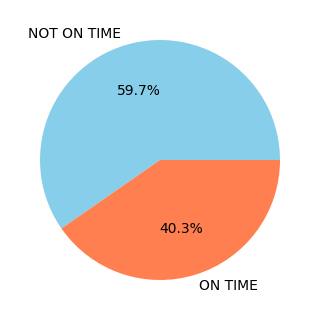

In [58]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = df['Reached.on.Time_Y.N'].value_counts()
label = ['NOT ON TIME','ON TIME']
cl = ['skyblue', 'coral']
ax.pie(data, labels = label,colors = cl,autopct='%1.1f%%')
plt.show()

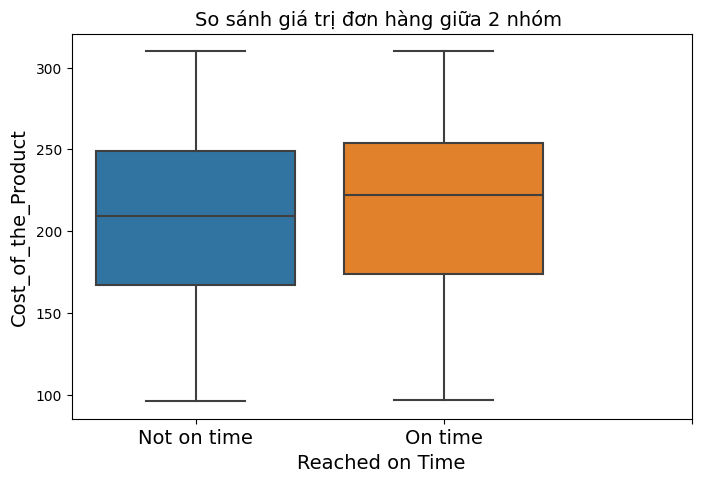

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Cost_of_the_Product', data=df);
plt.xticks(x, fontsize=14)
plt.xlabel("Reached on Time", fontsize=14)
plt.ylabel("Cost_of_the_Product", fontsize=14)
plt.title("So sánh giá trị đơn hàng giữa 2 nhóm ", fontsize=14)
plt.show()

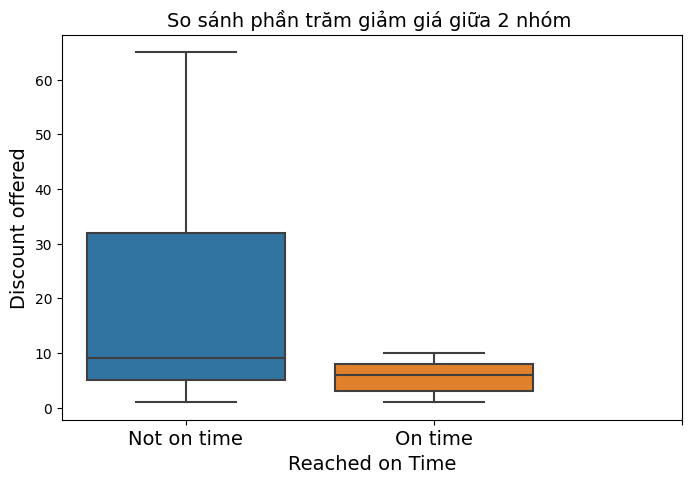

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df);
plt.xticks(x, fontsize=14)
plt.xlabel("Reached on Time", fontsize=14)
plt.ylabel("Discount offered", fontsize=14)
plt.title("So sánh phần trăm giảm giá giữa 2 nhóm ", fontsize=14)
plt.show()

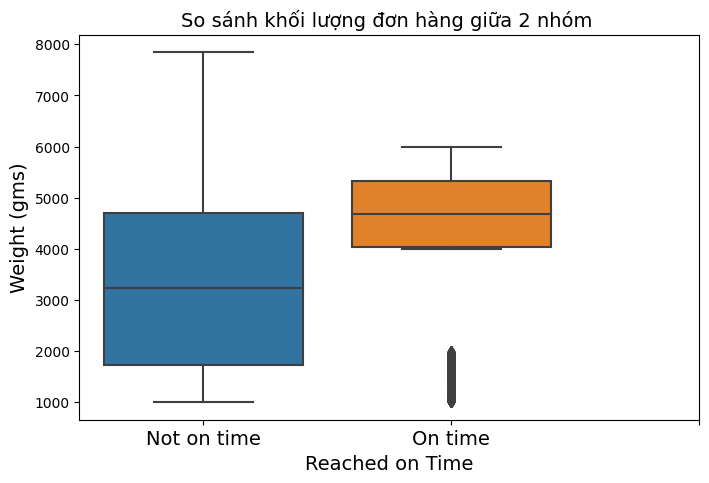

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=df);
plt.xticks(x, fontsize=14)
plt.xlabel("Reached on Time", fontsize=14)
plt.ylabel("Weight (gms)", fontsize=14)
plt.title("So sánh khối lượng đơn hàng giữa 2 nhóm ", fontsize=14)
plt.show()


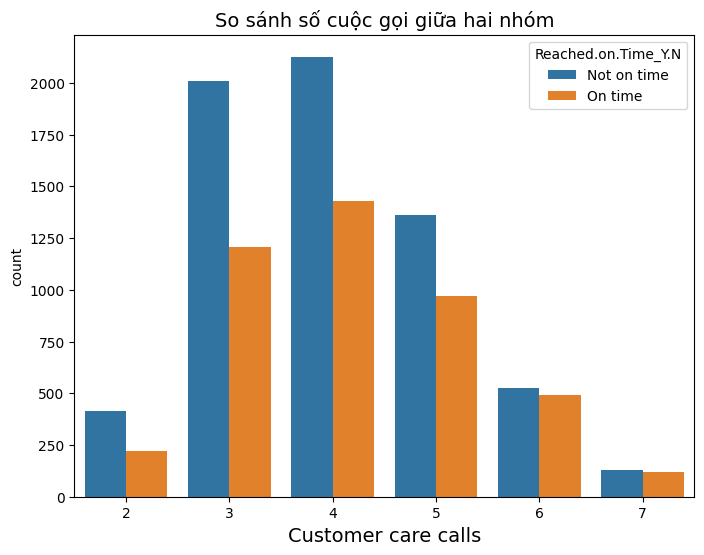

In [62]:

plt.figure(figsize = (8, 6))
sns.countplot(x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df)
plt.xlabel("Customer care calls", fontsize=14)
plt.title("So sánh số cuộc gọi giữa hai nhóm", fontsize=14)
plt.show()


The shipment tends to deliver on time when the discount under 10% and weight is 1 - 2 Kg & 4 - 6 Kg.
Most of products that cost around $300 delivered on time, others late.
Majority customers who get the late parcels are more likely to call customer care, no matter how often they called.

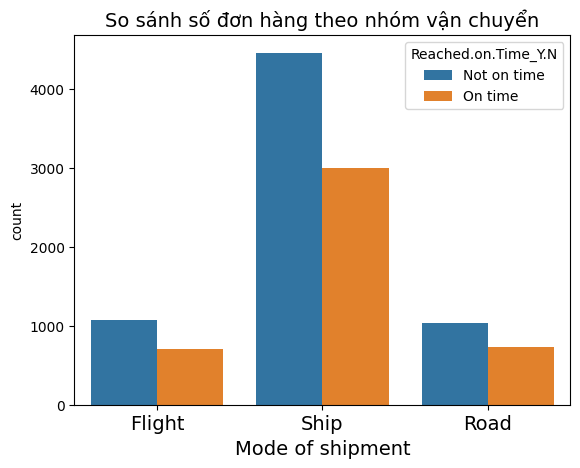

In [63]:
sns.countplot(data=df,x="Mode_of_Shipment",hue='Reached.on.Time_Y.N')
plt.xticks(x, fontsize=14)
plt.xlabel("Mode of shipment", fontsize=14)
plt.title("So sánh số đơn hàng theo nhóm vận chuyển", fontsize=14)
plt.show()

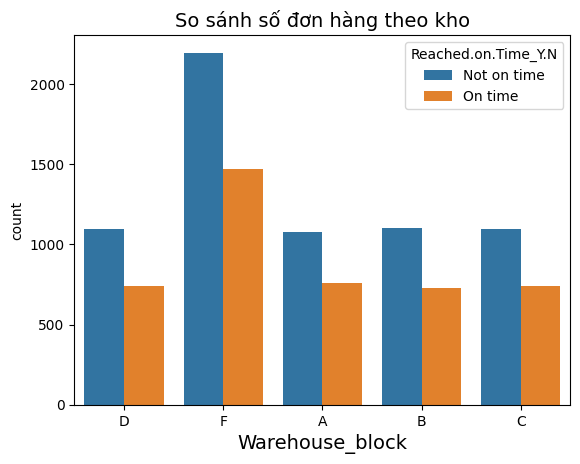

In [64]:
sns.countplot(data=df,x="Warehouse_block",hue='Reached.on.Time_Y.N')
plt.xlabel("Warehouse_block", fontsize=14)
plt.title("So sánh số đơn hàng theo kho", fontsize=14)
plt.show()

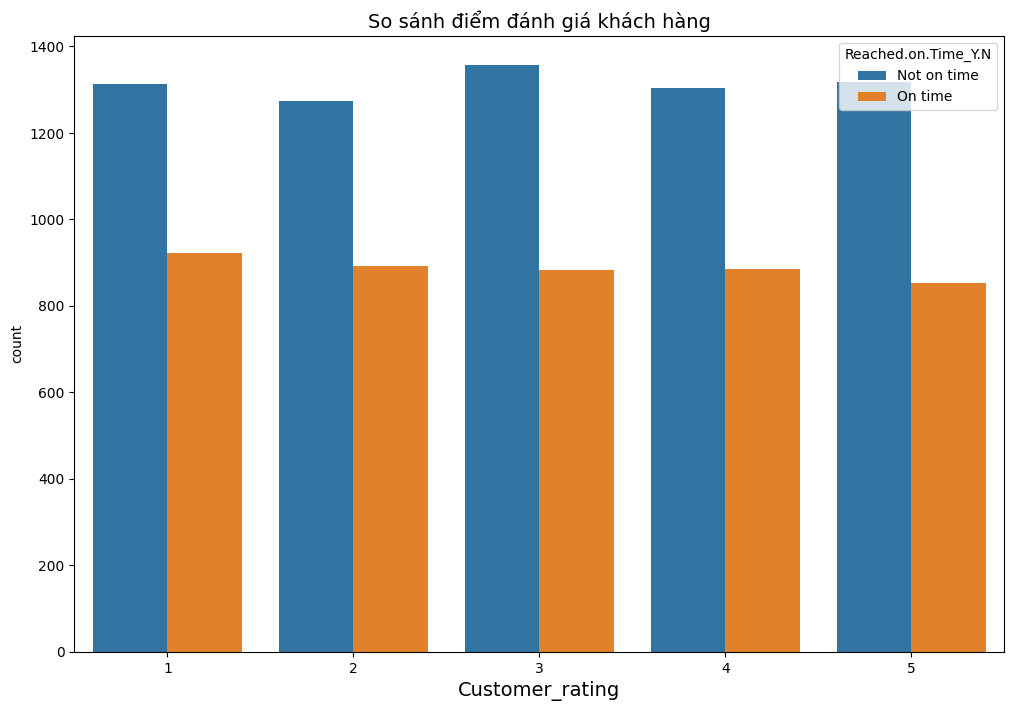

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Customer_rating",hue='Reached.on.Time_Y.N')
plt.xlabel("Customer_rating", fontsize=14)
plt.title("So sánh điểm đánh giá khách hàng", fontsize=14)
plt.show()

# Mã hoá dữ liệu


In [66]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Warehouse_block'] = le.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment']= le.fit_transform(df['Mode_of_Shipment'])
df['Product_importance']= le.fit_transform(df['Product_importance'])
df['Gender']= le.fit_transform(df['Gender'])
df['Reached.on.Time_Y.N']= df['Reached.on.Time_Y.N'].replace({'On time':0 ,'Not on time':1})
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538,1
10995,1,2,4,1,232,5,2,0,6,1247,0
10996,2,2,5,4,242,5,1,0,4,1155,0
10997,4,2,5,2,223,6,2,1,2,1210,0


#Xem sự tương quan giữa các biến

<Axes: >

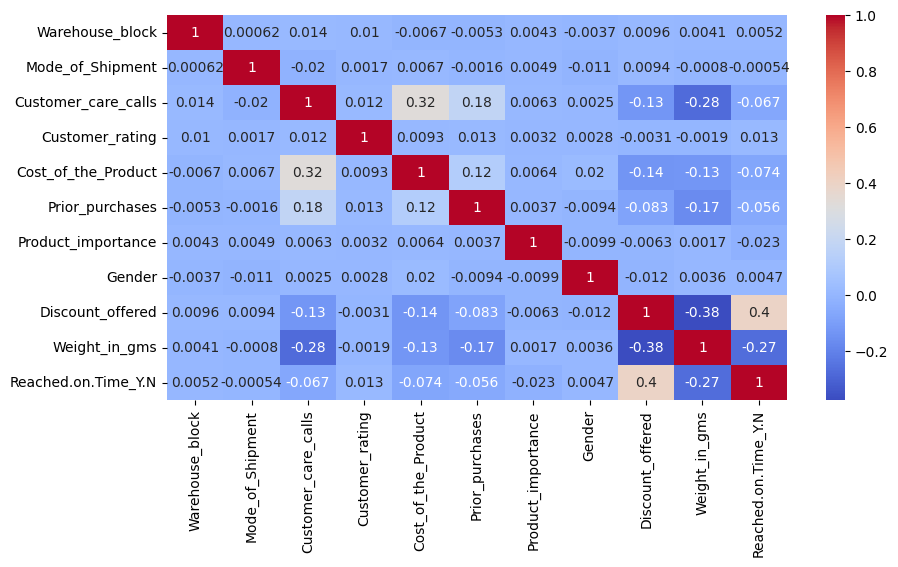

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


#Chạy mô hình

In [ ]:
data=df[['Discount_offered','Weight_in_gms','Mode_of_Shipment','Customer_care_calls','Customer_rating','Cost_of_the_Product',	'Prior_purchases', 'Product_importance','Reached.on.Time_Y.N']]

In [ ]:
data_dummy = pd.get_dummies(data,drop_first=True)
X = data.iloc[:, :-1].values
y = data['Reached.on.Time_Y.N']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.7, random_state=None)

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1712, 1419],
       [1431, 3138]])

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55      3131
           1       0.69      0.69      0.69      4569

    accuracy                           0.63      7700
   macro avg       0.62      0.62      0.62      7700
weighted avg       0.63      0.63      0.63      7700



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

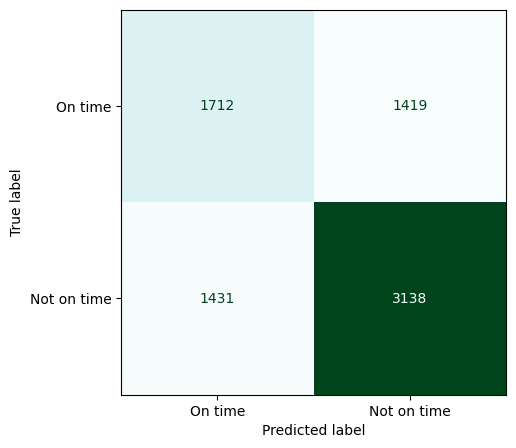

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 5))
labels = ['On time', 'Not on time']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")
plt.savefig('my_plot.png', dpi=300)
from google.colab import files
files.download('my_plot.png')

In [ ]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
y_pred=model_GNB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      3131
           1       0.97      0.43      0.60      4569

    accuracy                           0.66      7700
   macro avg       0.76      0.71      0.65      7700
weighted avg       0.80      0.66      0.64      7700



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

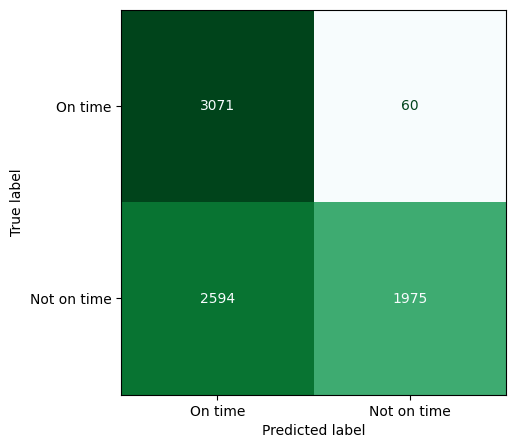

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 5))
labels = ['On time', 'Not on time']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")
plt.savefig('my_plot.png', dpi=300)
from google.colab import files
files.download('my_plot.png')

In [ ]:
#DecisionTreeClassifier
from sklearn import tree
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred=model_DT.predict(X_test)
model_DT_score= model_DT.score(X_test,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56      3131
           1       0.70      0.71      0.70      4569

    accuracy                           0.64      7700
   macro avg       0.63      0.63      0.63      7700
weighted avg       0.64      0.64      0.64      7700



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

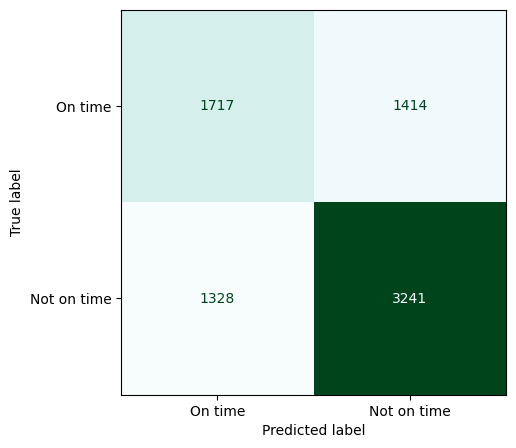

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 5))
labels = ['On time', 'Not on time']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")
plt.savefig('my_plot.png', dpi=300)
from google.colab import files
files.download('my_plot.png')

In [ ]:
#Tìm siêu tham số cho RandomForest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=7,random_state=1,max_samples=0.7)
model_rf.fit(X_train, y_train)
y_pred=model_rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
doChinhXac =[]
for i in range(1,20,1):
  model_rf = RandomForestClassifier(n_estimators=i,random_state=1,max_samples=0.7)
  model_rf.fit(X_train, y_train)
  y_pred=model_rf.predict(X_test)
  doChinhXac.append(accuracy_score(y_test,y_pred))


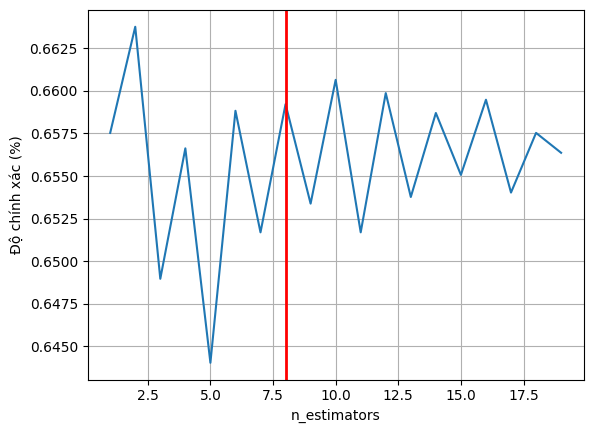

In [ ]:
plt.xlabel('n_estimators')
plt.ylabel('Độ chính xác (%)')
plt.plot([i for i in range(1,20)], doChinhXac)
plt.grid()
plt.axvline(x=8,linewidth=2, color = 'r')

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=8,random_state=1,max_samples=0.7)
model_RF.fit(X_train, y_train)
y_pred=model_RF.predict(X_test)
model_DT_score= model_RF.score(X_test,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.70      0.62      3131
           1       0.75      0.63      0.69      4569

    accuracy                           0.66      7700
   macro avg       0.66      0.66      0.66      7700
weighted avg       0.68      0.66      0.66      7700



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

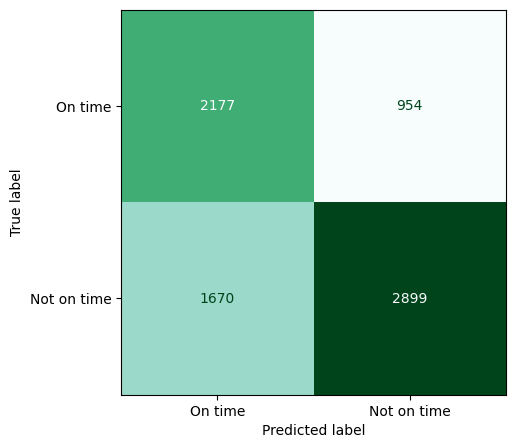

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 5))
labels = ['On time', 'Not on time']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")
plt.savefig('my_plot.png', dpi=300)
from google.colab import files
files.download('my_plot.png')

Nhận thấy có sự mất cân bằng dữ liệu-> Tiến hành áp dụng các biện pháp cân bằng dữ liệu

#SMOTE and evaluate

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
data_dummy = pd.get_dummies(data,drop_first=True)
X = data.iloc[:, :-1].values
y = data['Reached.on.Time_Y.N']

X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((13126, 8), (13126,))

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.5, random_state=2)
model_Reg = LogisticRegression()
model_Reg.fit(X_train, y_train)
y_pred3= model.predict(X_test)
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61      3270
           1       0.62      0.70      0.66      3293

    accuracy                           0.63      6563
   macro avg       0.64      0.63      0.63      6563
weighted avg       0.64      0.63      0.63      6563



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

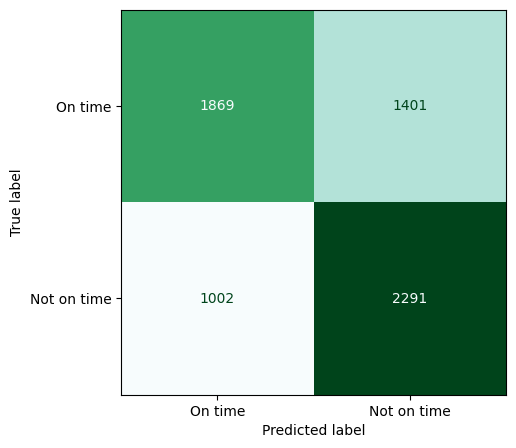

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 5))
labels = ['On time', 'Not on time']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred3, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")

In [ ]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
y_pred3=model_GNB.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77      3270
           1       0.98      0.43      0.60      3293

    accuracy                           0.71      6563
   macro avg       0.81      0.71      0.68      6563
weighted avg       0.81      0.71      0.68      6563



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

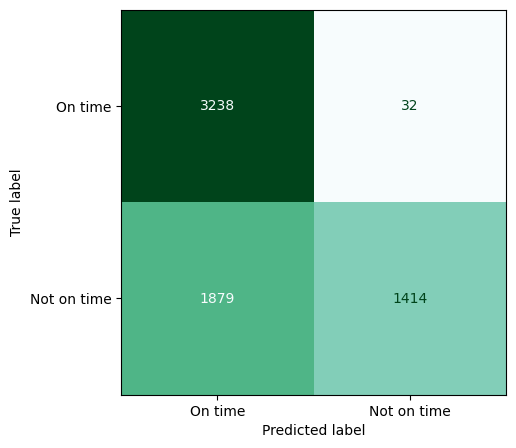

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 5))
labels = ['On time', 'Not on time']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred3, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")

In [ ]:
#DecisionTreeClassifier
from sklearn import tree
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred3=model_DT.predict(X_test)
model_DT_score= model_DT.score(X_test,y_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      3270
           1       0.68      0.70      0.69      3293

    accuracy                           0.68      6563
   macro avg       0.68      0.68      0.68      6563
weighted avg       0.68      0.68      0.68      6563



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

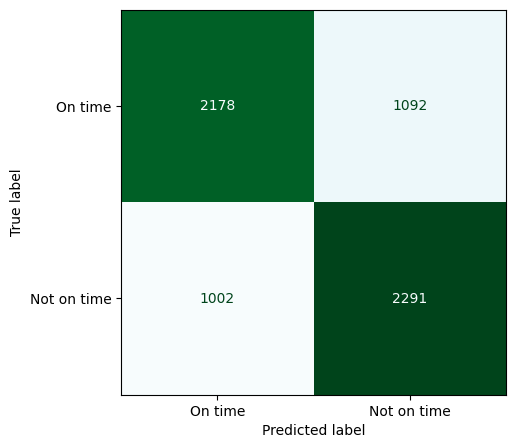

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 5))
labels = ['On time', 'Not on time']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred3, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=15,random_state=1,max_samples=0.7)
model_RF.fit(X_train, y_train)
y_pred3=model_RF.predict(X_test)
model_DT_score= model_RF.score(X_test,y_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      3270
           1       0.77      0.61      0.68      3293

    accuracy                           0.71      6563
   macro avg       0.72      0.71      0.71      6563
weighted avg       0.72      0.71      0.71      6563



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

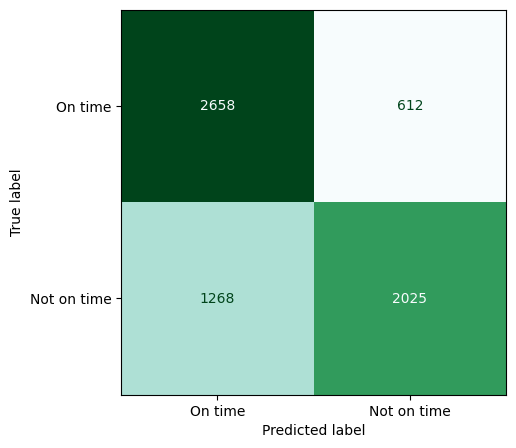

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 5))
labels = ['On time', 'Not on time']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred3, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="BuGn")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

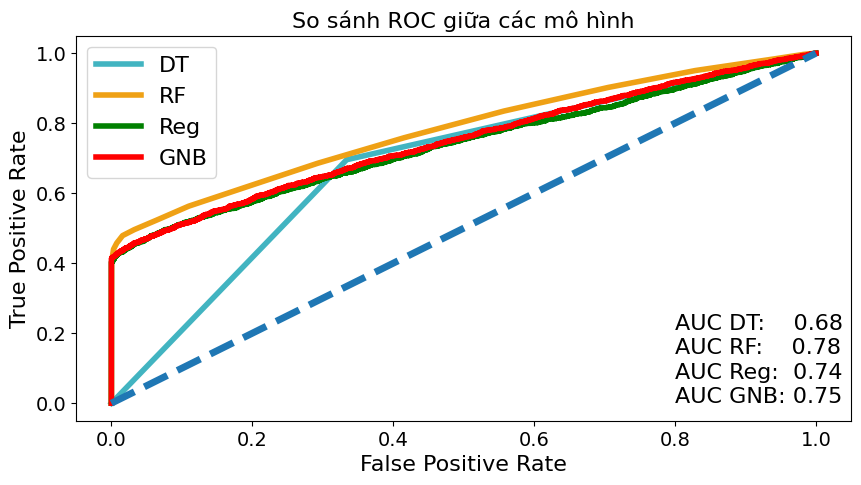

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
#set up plotting area
#plt.figure(0).clf()
plt.figure(figsize=(10,5))
#Vẽ ROC của mô hình đầu tiên
y_probabilities = model_DT.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#42b4c1')
plt.text(0.8,0.21,'AUC DT:    {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
#Vẽ ROC của mô hình thứ 2
y_probabilities_2 = model_RF.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_2)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#efa115')
plt.text(0.8,0.14,'AUC RF:    {:.2f}'.format(roc_auc_score(y_test,y_probabilities_2)),size= 16)
#Vẽ ROC của mô hình thứ 3
y_probabilities_3 = model_Reg.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_3)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='green')
plt.text(0.8,0.07,'AUC Reg:  {:.2f}'.format(roc_auc_score(y_test,y_probabilities_3)),size= 16)
#Vẽ ROC của mô hình thứ 4
y_probabilities_4 = model_GNB.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_4)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.text(0.8,0,'AUC GNB: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_4)),size= 16)
#Vẽ ROC của mô hình thứ 5
#y_probabilities_1 = SVC.predict_proba(X_test)[:,-1]
#false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_1)
#plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='purple')
#plt.text(0.6,0.02,'AUC SVC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_1)),size= 16)
#format
plt.plot([0,1],ls='--',linewidth=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('So sánh ROC giữa các mô hình', fontsize=16)
plt.legend(['DT', 'RF', 'Reg', 'GNB'], fontsize=16 )
plt.savefig('my_plot.png', dpi=300)
from google.colab import files
files.download('my_plot.png')